# Alzheimer's Disease Prediction - Data Preprocessing

This notebook handles data preprocessing using the modular preprocessing pipeline.

## 1. Import Libraries and Modules

In [1]:
import sys
sys.path.append('../src')

from data_preprocessing import DataPreprocessor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Modules imported successfully!")

Modules imported successfully!


## 2. Initialize Preprocessor

In [2]:
# Initialize the preprocessor
preprocessor = DataPreprocessor()
print("DataPreprocessor initialized!")

DataPreprocessor initialized!


## 3. Load Data

In [3]:
# Load the dataset
df = preprocessor.load_data('../data/raw/alzheimers_disease_data.csv')
df.head()

Loading data from ../data/raw/alzheimers_disease_data.csv...
Data loaded successfully! Shape: (2149, 35)


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


## 4. Run Complete Preprocessing Pipeline

In [4]:
# Run the complete preprocessing pipeline
processed_data = preprocessor.preprocess_pipeline(
    target_column='Diagnosis',
    drop_columns=['PatientID', 'DoctorInCharge'],
    test_size=0.2,
    scale=True
)

# Extract processed datasets
X_train = processed_data['X_train']
X_test = processed_data['X_test']
y_train = processed_data['y_train']
y_test = processed_data['y_test']
feature_names = processed_data['feature_names']

print(f"\nProcessed Data Shapes:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

STARTING PREPROCESSING PIPELINE

Handling missing values with strategy: mean
No missing values found!

Encoding categorical variables...
  Encoded: DoctorInCharge
Encoded 1 categorical variables

Preparing features and target...
Target column: Diagnosis
Features: 32 columns
Target: 2149 samples

Splitting data (test_size=0.2)...
Training set: 1719 samples
Test set: 430 samples

Scaling features...
Features scaled successfully!

PREPROCESSING COMPLETED SUCCESSFULLY!

Processed Data Shapes:
X_train: (1719, 32)
X_test: (430, 32)
y_train: (1719,)
y_test: (430,)


## 5. Verify Preprocessing Results

In [5]:
# Check for missing values
print("Missing values in training set:")
print(X_train.isnull().sum().sum())

print("\nMissing values in test set:")
print(X_test.isnull().sum().sum())

Missing values in training set:
0

Missing values in test set:
0


In [6]:
# Check data types
print("Data types in training set:")
print(X_train.dtypes.value_counts())

Data types in training set:
float64    32
Name: count, dtype: int64


Target distribution in training set:
Diagnosis
0    1111
1     608
Name: count, dtype: int64

Percentage:
Diagnosis
0    64.630599
1    35.369401
Name: proportion, dtype: float64


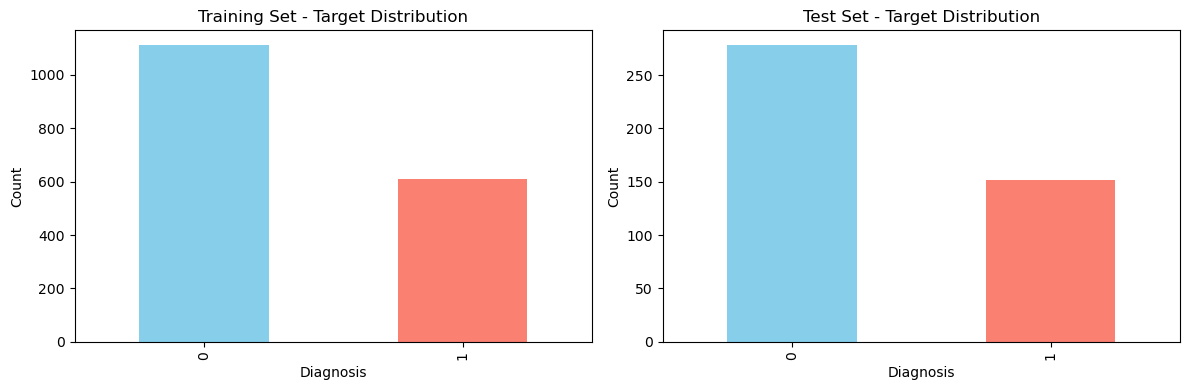

In [7]:
# Check target distribution
print("Target distribution in training set:")
print(y_train.value_counts())
print("\nPercentage:")
print(y_train.value_counts(normalize=True) * 100)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

y_train.value_counts().plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('Training Set - Target Distribution')
axes[0].set_xlabel('Diagnosis')
axes[0].set_ylabel('Count')

y_test.value_counts().plot(kind='bar', ax=axes[1], color=['skyblue', 'salmon'])
axes[1].set_title('Test Set - Target Distribution')
axes[1].set_xlabel('Diagnosis')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

## 6. Save Processed Data

In [8]:
# Save processed data and preprocessing artifacts
preprocessor.save_processed_data('../data/processed')
print("\nProcessed data saved successfully!")


Saving processed data to ../data/processed...
Processed data saved successfully!

Processed data saved successfully!


## 7. Summary

### Preprocessing Steps Completed:
1. ✅ Data loaded successfully
2. ✅ Missing values handled
3. ✅ Categorical variables encoded
4. ✅ Features and target separated
5. ✅ Data split into train/test sets (80/20)
6. ✅ Features scaled using StandardScaler
7. ✅ Processed data saved

### Ready for:
- Feature engineering
- Model training
- Model evaluation

In [9]:
print("\n" + "="*60)
print("DATA PREPROCESSING COMPLETED!")
print("="*60)
print(f"\nTraining samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")
print(f"\nReady for model training!")


DATA PREPROCESSING COMPLETED!

Training samples: 1719
Test samples: 430
Number of features: 32

Ready for model training!
